In [1]:
import pandas as pd
import requests as rq
from bs4 import BeautifulSoup
import numpy as np


# URL to wikipedia of Serial Killers in USA
url = 'https://en.wikipedia.org/wiki/List_of_serial_killers_in_the_United_States'

# Read the table directly into pandas dataframe
df_serial_killers = pd.read_html(url)[0]

# Drop the Sources columns
df_serial_killers.drop(columns=['Source(s)']).head()


,Name,Years active,Proven victims,Possible victims,Status,Notes
0,"Ables, Tony",1970–1990,4,4+,Sentenced to death; commuted to life imprisonment,"Murdered robbery victim in 1970, and at least ..."
1,"Adams, Edward James",1920–1921,7,7,Killed by police during shootout,"Criminal who murdered seven people, including ..."
2,"Agrue, John",1966–1982,3,3+,Died in 2009,Killed his sister-in-law in Illinois; paroled ...
3,"Albanese, Charles",1980–1981,3,3,Executed 1995,Poisoned family members with arsenic in Fox La...
4,"Albright, Charles",1990–1991,1,3,Died in prison,"Texas man known as the ""Eyeball Killer"" becaus..."


In [2]:
# Use the external link to get each killers wikipedia page from the first column that contains the href tag
wikibio_link = pd.read_html(url,extract_links='all' )[0].iloc[:,0]

# Add https://en.wikipedia.org/ to each link
wikibio = ["https://en.wikipedia.org"+list(links)[1] for links in wikibio_link]

# Access each page and query the bday class to obtain bday and add as DOB column to df_serial_killers dataframe
bday = []
for biography in wikibio:
    try:
        soup = BeautifulSoup(rq.get(biography).text, 'html.parser')
        bday.append(soup.find('span', {'class': 'bday'}).get_text())
    except AttributeError:
        bday.append(np.nan)
print('Successfully')
len(bday)

df_serial_killers = df_serial_killers.assign(DOB=bday)

df_serial_killers['DOB'] = pd.to_datetime(df_serial_killers['DOB'])
df_serial_killers['Month'] = df_serial_killers['DOB'].dt.month_name()


Successfully


,Name,Years active,Proven victims,Possible victims,Status,Notes,Source(s),DOB
0,"Ables, Tony",1970–1990,4,4+,Sentenced to death; commuted to life imprisonment,"Murdered robbery victim in 1970, and at least ...",[4],1954-12-28
1,"Adams, Edward James",1920–1921,7,7,Killed by police during shootout,"Criminal who murdered seven people, including ...",[5],NaT
2,"Agrue, John",1966–1982,3,3+,Died in 2009,Killed his sister-in-law in Illinois; paroled ...,[6],1947-09-11
3,"Albanese, Charles",1980–1981,3,3,Executed 1995,Poisoned family members with arsenic in Fox La...,[7],1937-06-13
4,"Albright, Charles",1990–1991,1,3,Died in prison,"Texas man known as the ""Eyeball Killer"" becaus...",[8],1933-08-10
...,...,...,...,...,...,...,...,...
666,"Wooten, Charles",1969–1993,3,3,Sentenced to life imprisonment,Killed two gas station attendants in Fort Wort...,[730],NaT
667,"Wright, Douglas Franklin",1969–1991,7,7+,Executed 1996,First criminal executed by lethal injection in...,[731],1940-03-25
668,"Wuornos, Aileen",1989–1990,7,7,Executed 2002,"Known as the ""Damsel of Death""; shot seven men...",[732],1956-02-29
669,"Yates, Robert Lee",1975–1998,13,18+,Sentenced to death; commuted to life imprisonment,"Targeted women in and around Spokane, Washington",[733],1952-05-27


In [81]:
x = pd.to_datetime(df_serial_killers['DOB'])

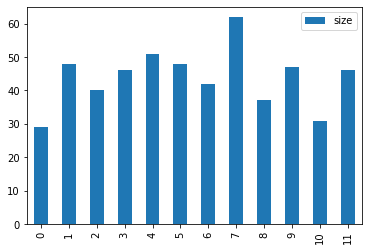

In [101]:
df = pd.DataFrame({'freq': list(x.dt.month_name())})
df.groupby('freq', as_index=False).size().plot(kind='bar')
plt.show()


In [106]:
df = pd.DataFrame({'freq': list(x.dt.month_name())})
df['freq'].value_counts


0       December
1            NaN
2      September
3           June
4         August
         ...    
666          NaN
667        March
668     February
669          May
670    September
Name: freq, Length: 671, dtype: object

In [116]:
df1 = pd.DataFrame(df.value_counts(), columns=[['Months']])
df1.assign(Percentage = lambda x: (x['Months']/x['Months'].sum() * 100))

,Months,Percentage
freq,,
March,62,11.764706
January,51,9.677419
August,48,9.108159
July,48,9.108159
November,47,8.918406
February,46,8.728653
September,46,8.728653
June,42,7.969639
December,40,7.590133
